### Following an Internet Example for an Animated Ising Model
http://jakevdp.github.io/blog/2017/12/11/live-coding-cython-ising-model/

In [4]:
import numpy as np
from PIL import Image

In [3]:
def random_spin_field(N,M):
    return np.random.choice([-1,1], size=(N,M))

random_spin_field(10,10)

array([[-1, -1, -1, -1,  1, -1,  1, -1, -1,  1],
       [ 1, -1,  1, -1, -1,  1, -1, -1, -1, -1],
       [ 1, -1, -1,  1,  1,  1,  1,  1, -1,  1],
       [-1, -1, -1,  1,  1,  1,  1, -1,  1, -1],
       [-1,  1, -1,  1, -1, -1, -1, -1,  1,  1],
       [-1,  1, -1, -1,  1,  1,  1,  1, -1,  1],
       [ 1,  1,  1,  1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1,  1, -1, -1,  1,  1, -1, -1],
       [-1, -1, -1,  1, -1, -1, -1,  1, -1, -1],
       [ 1,  1,  1, -1,  1,  1,  1, -1,  1,  1]])

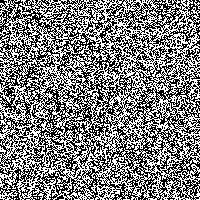

In [5]:
def display_spin_field(field):
    return Image.fromarray(np.uint8((field + 1) * 0.5 * 255))

display_spin_field(random_spin_field(200,200))

### Implementing the Ising model

In [6]:
def ising_step(field, beta=0.4):
    N, M = field.shape
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    _ising_update(field, n, m, beta)
    return field

def _ising_update(field, n, m, beta):
    total = 0
    N, M = field.shape
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i %N, j % M]
    dE = 2 * field[n, m] * total
    if dE <= 0:
        field[n, m] *= -1
    elif np.exp(-dE*beta) > np.random.rand():
        field[n, m] *= -1

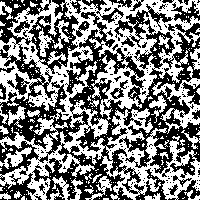

In [7]:
display_spin_field(ising_step(random_spin_field(200, 200)))

### Animating an Ising Sequence

In [8]:
from ipywidgets import interact

In [9]:
def display_ising_sequence(images):
    def _show(frame=(0, len(images) -1)):
        return display_spin_field(images[frame])
    return interact(_show)

In [10]:
images = [random_spin_field(200, 200)]
for i in range(50):
    images.append(ising_step(images[-1].copy()))

display_ising_sequence(images);

interactive(children=(IntSlider(value=25, description='frame', max=50), Output()), _dom_classes=('widget-inter…

In [15]:
images[0].shape, len(images)

((200, 200), 51)